# Exploratory Analysis

## Problems:

Load the NYC AirBnB Truncated Dataset. This dataset is a mirror of the full NYC AirBnB dataset found at Kaggle, but only contains the first 10,000 entries. 

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

For the numerical features, 

1) Display histograms for the numerical features. 

2) Construct the scatter plots of price with each of the numerical features.

3) Display the correlation histogram.  

4) Using numerical features to predict the renting price. 

5) Write down the predict function from (4)

6) Calculate the RSS cost.  

Firstly, I imported the dataset into the notebook, after that I looked into the attributes of the dataset, what type of dataset it is, information about the dataset and it's dimensions 

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Datasets/NYCAirBnB/train.csv")
data

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Cozy apt in heart of the e village,40076332,Steven,Manhattan,East Village,40.72644,-73.98403,Entire home/apt,175,5,0,NaN,NaN,1,0
9995,Perfect Location - Meticulously Kept Flat,12620454,Will,Brooklyn,Bushwick,40.70442,-73.92484,Entire home/apt,220,5,27,1/1/2017,0.57,1,0
9996,Garden Apt in Historic Brownstone!,2060383,Lisa,Brooklyn,Cobble Hill,40.68732,-73.99245,Entire home/apt,147,3,23,6/16/2019,0.51,1,2
9997,East Village Private Room & Terrace,39956905,Can,Manhattan,East Village,40.72811,-73.98453,Private room,95,2,1,8/29/2015,0.02,2,0


In [3]:
display(type(data))
display(data.head(5))
display(data.tail(5))
print("Our datasets has dimensions", data.shape)

pandas.core.frame.DataFrame

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9994,Cozy apt in heart of the e village,40076332,Steven,Manhattan,East Village,40.72644,-73.98403,Entire home/apt,175,5,0,NaN,NaN,1,0
9995,Perfect Location - Meticulously Kept Flat,12620454,Will,Brooklyn,Bushwick,40.70442,-73.92484,Entire home/apt,220,5,27,1/1/2017,0.57,1,0
9996,Garden Apt in Historic Brownstone!,2060383,Lisa,Brooklyn,Cobble Hill,40.68732,-73.99245,Entire home/apt,147,3,23,6/16/2019,0.51,1,2
9997,East Village Private Room & Terrace,39956905,Can,Manhattan,East Village,40.72811,-73.98453,Private room,95,2,1,8/29/2015,0.02,2,0
9998,Cosy apartment in Carroll Gardens,33064750,Suzan,Brooklyn,Carroll Gardens,40.68282,-73.99774,Entire home/apt,160,5,2,8/8/2017,0.06,1,0


Our datasets has dimensions (9999, 15)


In [4]:
names = list(data)
print(names)

['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            9991 non-null   object 
 1   host_id                         9999 non-null   int64  
 2   host_name                       9989 non-null   object 
 3   neighbourhood_group             9999 non-null   object 
 4   neighbourhood                   9999 non-null   object 
 5   latitude                        9999 non-null   float64
 6   longitude                       9999 non-null   float64
 7   room_type                       9999 non-null   object 
 8   price                           9999 non-null   int64  
 9   minimum_nights                  9999 non-null   int64  
 10  number_of_reviews               9999 non-null   int64  
 11  last_review                     8677 non-null   object 
 12  reviews_per_month               86

In [6]:
#histograms for numerical features

I used the in-built hist() function to plot histograms for the numerical features of the dataset, here I found out that the values are quite scattered for X-axis , so in my X-axis vs count plots I saw that there were a lot of values of X for which a corresponding count on Y-axis did not exist, this is where I realised that if I cleaned the data and then try to make the histograms , I might get better results.First,I thought about dropping columns but that did not feel necessary as there were no coloumns with a huge amount of null values, So I calculated deviation of values in price column from it's mean, and repeated the same for minimum_nights,number_of_reviews,reviews_per_month and calculated_host_listings_count. After cleaning the data I made these plots again with a maximum value constariant so I could get better plots . 

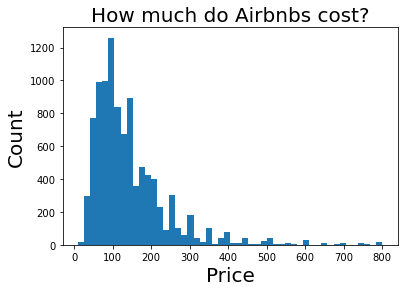

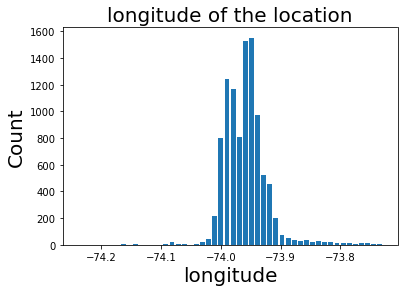

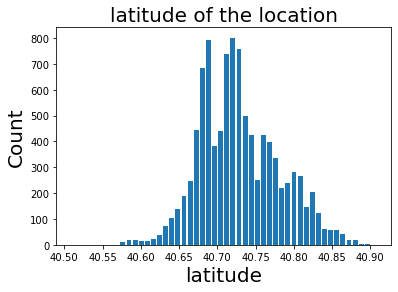

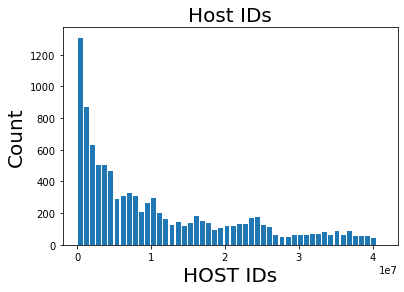

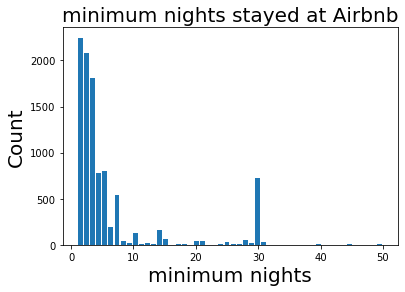

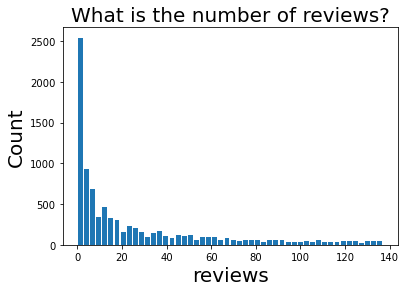

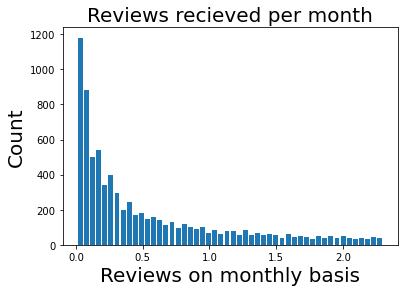

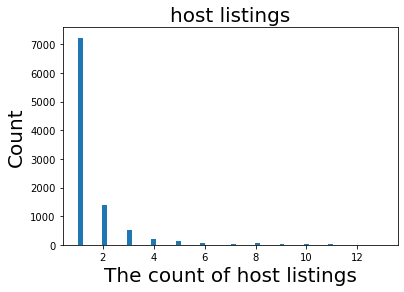

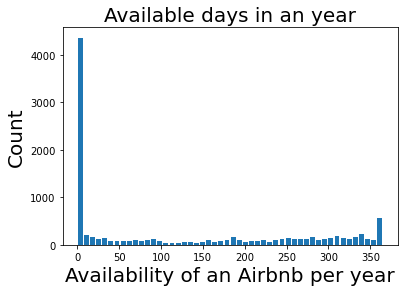

In [7]:
from matplotlib import pyplot as plt
fig1, ax1 = plt.subplots()
x = data.price <809
ax1.hist(data.price[x],bins=50, rwidth=1)
ax1.set_xlabel("Price", fontsize=20)
ax1.set_ylabel("Count", fontsize=20)
ax1.set_title("How much do Airbnbs cost?", fontsize=20)

fig2, ax2 = plt.subplots()
ax2.hist(data.longitude,bins=50, rwidth=.8)
ax2.set_xlabel("longitude", fontsize=20)
ax2.set_ylabel("Count", fontsize=20)
ax2.set_title("longitude of the location", fontsize=20)

fig3, ax3 = plt.subplots()
ax3.hist(data.latitude,bins=50, rwidth=.8)
ax3.set_xlabel("latitude", fontsize=20)
ax3.set_ylabel("Count", fontsize=20)
ax3.set_title("latitude of the location", fontsize=20)

fig4, ax4 = plt.subplots()
ax4.hist(data.host_id,bins=50, rwidth=.8)
ax4.set_xlabel("HOST IDs", fontsize=20)
ax4.set_ylabel("Count", fontsize=20)
ax4.set_title("Host IDs", fontsize=20)

fig5, ax5 = plt.subplots()
#y = abs(data.minimum_nights-data.minimum_nights.mean()) < 2*(data.minimum_nights.std())
y= data.minimum_nights < 2*(data.minimum_nights.std())
ax5.hist(data.minimum_nights[y],bins=50, rwidth=.8)
ax5.set_xlabel("minimum nights", fontsize=20)
ax5.set_ylabel("Count", fontsize=20)
ax5.set_title("minimum nights stayed at Airbnb", fontsize=20)
fig6, ax6 = plt.subplots()

#z=abs(data.number_of_reviews-data.number_of_reviews.mean()) < 2*(data.number_of_reviews.std())
z= data.number_of_reviews < 2*(data.number_of_reviews.std())
ax6.hist(data.number_of_reviews[z],bins=50, rwidth=.8)
ax6.set_xlabel("reviews", fontsize=20)
ax6.set_ylabel("Count", fontsize=20)
ax6.set_title("What is the number of reviews?", fontsize=20)

fig7, ax7 = plt.subplots()
#p=abs(data.reviews_per_month-data.reviews_per_month.mean()) < 2*(data.reviews_per_month.std())
p=data.reviews_per_month < 2*(data.reviews_per_month.std())
ax7.hist(data.reviews_per_month[p],bins=50, rwidth=.8)
ax7.set_xlabel("Reviews on monthly basis", fontsize=20)
ax7.set_ylabel("Count", fontsize=20)
ax7.set_title("Reviews recieved per month", fontsize=20)

fig8, ax8 = plt.subplots()
#q=abs(data.calculated_host_listings_count-data.calculated_host_listings_count.mean())<2*(data.calculated_host_listings_count.std())
q=data.calculated_host_listings_count<2*(data.calculated_host_listings_count.std())
ax8.hist(data.calculated_host_listings_count[q],bins=50, rwidth=.8)
ax8.set_xlabel("The count of host listings", fontsize=20)
ax8.set_ylabel("Count", fontsize=20)
ax8.set_title("host listings", fontsize=20)

fig9, ax9 = plt.subplots()
ax9.hist(data.availability_365,bins=50, rwidth=.8)
ax9.set_xlabel("Availability of an Airbnb per year", fontsize=20)
ax9.set_ylabel("Count", fontsize=20)
ax9.set_title("Available days in an year", fontsize=20)
plt.show()

In the second question, to calculate scatter plots , I used the same values for the aforementioned coloumns, to get scatter plots for the cleaned data. I selected all the numerical features from the dataset which I wanted to plot. Then I made 9 scatter plots of every numerical feature vs price of the Airbnb. To make these plots in Python we use Matplotlib library of Python. 

In [8]:
#Scatter plots of price 

In [9]:
nums = data.select_dtypes(include=['int64','float64']) #selecting all the numerical features
display(nums.head(5))

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0


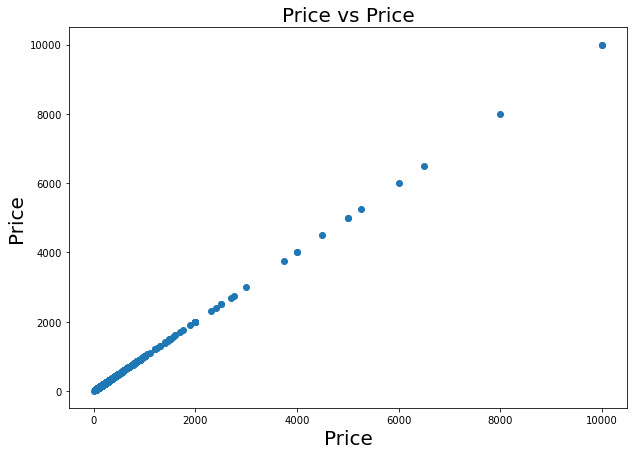

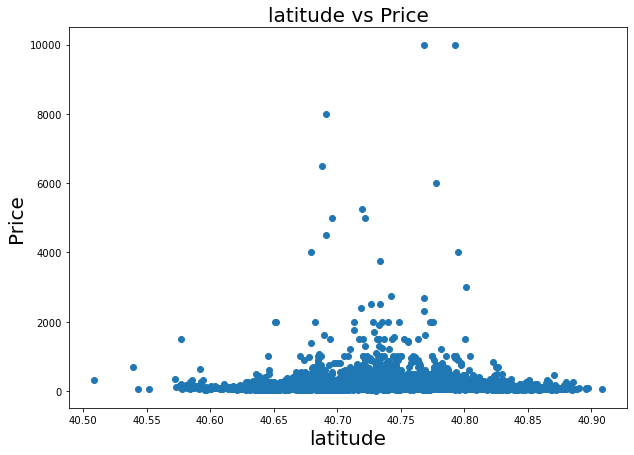

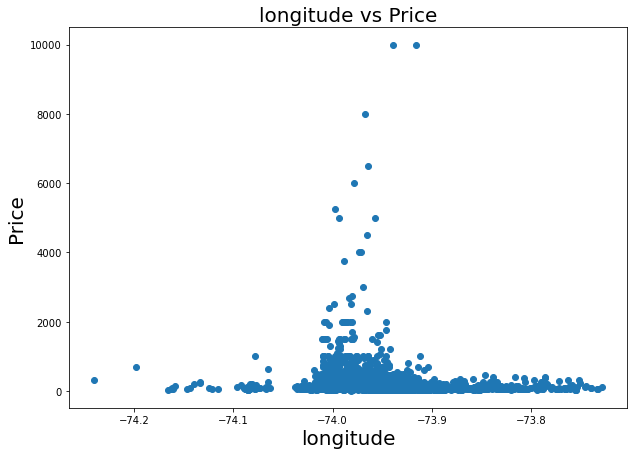

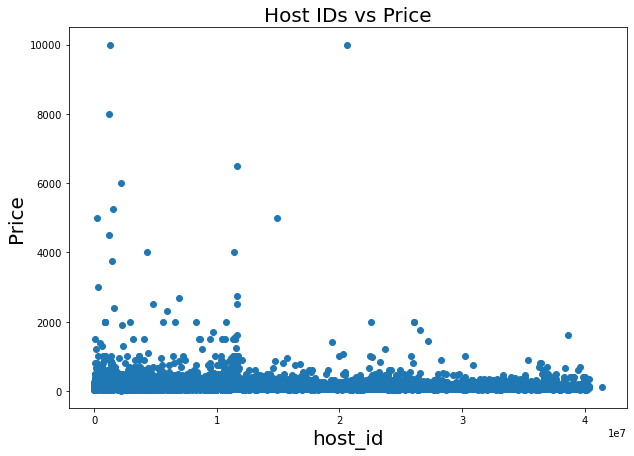

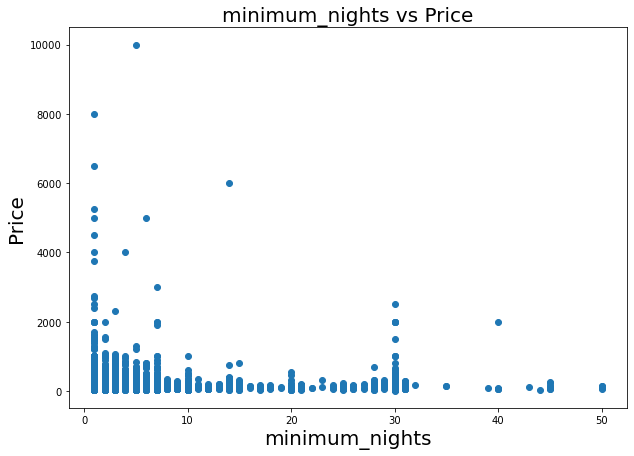

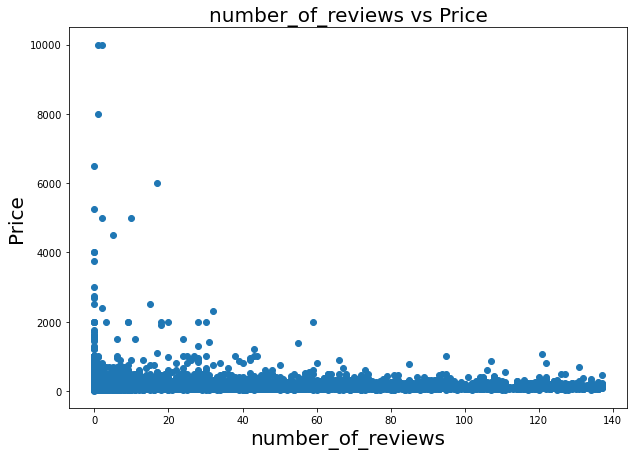

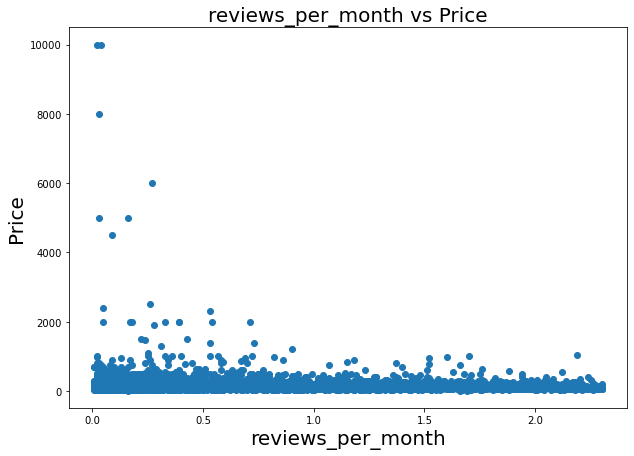

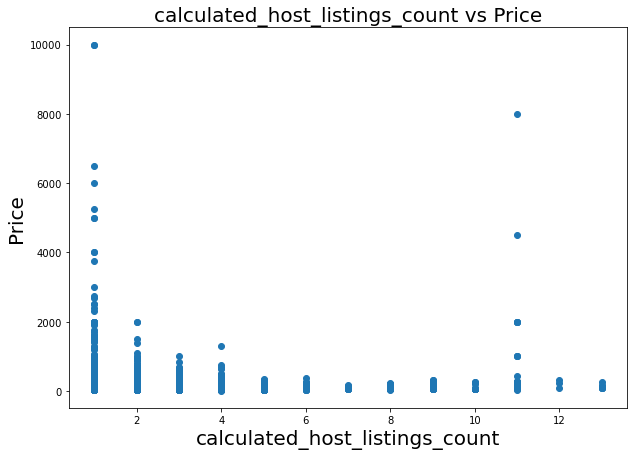

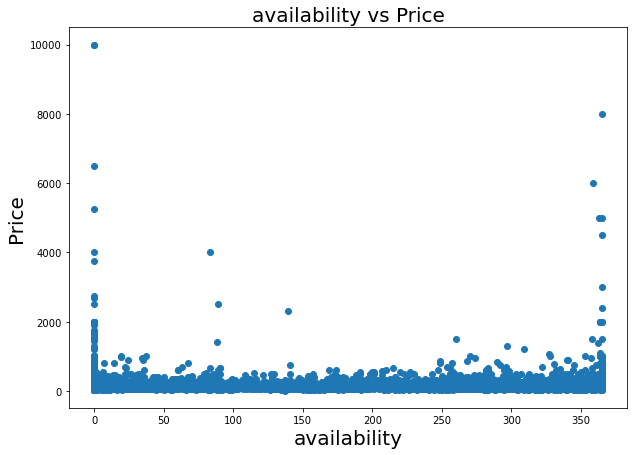

In [39]:
fig, ax = plt.subplots()

ax.plot(nums.price,nums.price,'o')
ax.set_xlabel("Price", fontsize=20)
ax.set_ylabel("Price", fontsize=20)
ax.set_title("Price vs Price", fontsize=20)
fig.set_size_inches(10, 7)
fig1, ax1 = plt.subplots()

ax1.plot(nums.latitude,nums.price,'o')
ax1.set_xlabel("latitude", fontsize=20)
ax1.set_ylabel("Price", fontsize=20)
ax1.set_title("latitude vs Price", fontsize=20)
fig1.set_size_inches(10, 7)

fig2, ax2 = plt.subplots()

ax2.plot(nums.longitude,nums.price,'o')
ax2.set_xlabel("longitude", fontsize=20)
ax2.set_ylabel("Price", fontsize=20)
ax2.set_title("longitude vs Price", fontsize=20)
fig2.set_size_inches(10, 7)

fig3, ax3 = plt.subplots()

ax3.plot(nums.host_id,nums.price,'o')
ax3.set_xlabel("host_id", fontsize=20)
ax3.set_ylabel("Price", fontsize=20)
ax3.set_title("Host IDs vs Price", fontsize=20)
fig3.set_size_inches(10, 7)
fig4, ax4 = plt.subplots()

ax4.plot(nums.minimum_nights[y],nums.price[y],'o') #y,z,p and q were calculated above to get "cleaner" and "better" plots
ax4.set_xlabel("minimum_nights", fontsize=20)
ax4.set_ylabel("Price", fontsize=20)
ax4.set_title("minimum_nights vs Price", fontsize=20)
fig4.set_size_inches(10, 7)
fig5, ax5 = plt.subplots()

ax5.plot(nums.number_of_reviews[z],nums.price[z],'o')
ax5.set_xlabel("number_of_reviews", fontsize=20)
ax5.set_ylabel("Price", fontsize=20)
ax5.set_title("number_of_reviews vs Price", fontsize=20)
fig5.set_size_inches(10, 7)

fig6, ax6 = plt.subplots()
ax6.plot(nums.reviews_per_month[p],nums.price[p],'o')
ax6.set_xlabel("reviews_per_month", fontsize=20)
ax6.set_ylabel("Price", fontsize=20)
ax6.set_title("reviews_per_month vs Price", fontsize=20)
fig6.set_size_inches(10, 7)
fig7, ax7 = plt.subplots()
ax7.plot(nums.calculated_host_listings_count[q],nums.price[q],'o')
ax7.set_xlabel("calculated_host_listings_count", fontsize=20)
ax7.set_ylabel("Price", fontsize=20)
ax7.set_title("calculated_host_listings_count vs Price", fontsize=20)
fig7.set_size_inches(10, 7)
fig8, ax8 = plt.subplots()

ax8.plot(nums.availability_365,nums.price,'o')
ax8.set_xlabel("availability", fontsize=20)
ax8.set_ylabel("Price", fontsize=20)
ax8.set_title("availability vs Price", fontsize=20)
fig8.set_size_inches(10, 7)
plt.show()

So far I have only been cleaning data during the plotting process to get better results, but I didn't clean the original data and at this stage , I realised that  should have made the changes in the original dataframe beforehand, that is I should have cleaned the entire dataset and then could have easily used it for all the plots. So better late than never! I cleaned the original dataset and made a new data set with all the numerical features and desired values.Then I used the heatmap() function from seaborn library to get the following correlation matrix

In [11]:
#data cleaning followed by correlation matrix plot

In [12]:
#calculating 2 and 3 standard deviations to clean data following the 68–95–99.7 rule ( the empirical rule) . Played around with some values 
#to determine if for a particular coloumn is it better to go with 2  or 3 standard deviations from the mean
data_1=nums[np.abs(nums.price-nums.price.mean())<= (3*nums.price.std())]
data_2=data_1[np.abs(data_1.minimum_nights- data_1.minimum_nights.mean())<= (2*nums.minimum_nights.std())]
data_3=data_2[np.abs(data_2.number_of_reviews- data_2.number_of_reviews.mean())<= (2*nums.number_of_reviews.std())]
data_4=data_3[np.abs(data_3.reviews_per_month- data_3.reviews_per_month.mean())<= (2*nums.reviews_per_month.std())]
data_new=data_4[np.abs(data_4.calculated_host_listings_count- data_4.calculated_host_listings_count.mean())<= (2*nums.calculated_host_listings_count.std())]



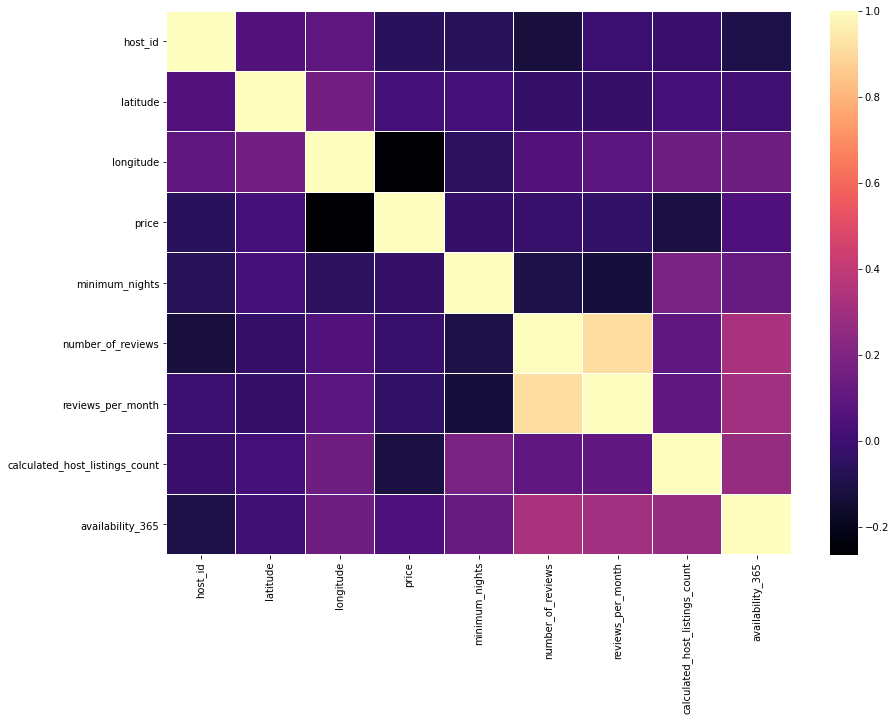

In [13]:
#Heatmap
import pandas as pd
import seaborn as sns
fig,ax = plt.subplots(figsize=(14, 10))
sns.heatmap(data_new.corr(), ax=ax, linewidths=0.05,cmap="magma")
plt.show() 

In [14]:
data_new.corr() #correlation matrix

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.053133,0.095909,-0.059024,-0.066685,-0.124636,-0.011505,-0.020464,-0.100541
latitude,0.053133,1.000000,0.158646,0.014864,0.016379,-0.027805,-0.027570,0.015343,0.000988
longitude,0.095909,0.158646,1.000000,-0.263524,-0.055318,0.056679,0.084700,0.147037,0.150768
price,-0.059024,0.014864,-0.263524,1.000000,-0.026848,-0.026154,-0.039576,-0.113952,0.045194
minimum_nights,-0.066685,0.016379,-0.055318,-0.026848,1.000000,-0.104779,-0.128793,0.181846,0.124700
number_of_reviews,-0.124636,-0.027805,0.056679,-0.026154,-0.104779,1.000000,0.915078,0.103826,0.324526
reviews_per_month,-0.011505,-0.027570,0.084700,-0.039576,-0.128793,0.915078,1.000000,0.104280,0.300817
calculated_host_listings_count,-0.020464,0.015343,0.147037,-0.113952,0.181846,0.103826,0.104280,1.000000,0.271640
availability_365,-0.100541,0.000988,0.150768,0.045194,0.124700,0.324526,0.300817,0.271640,1.000000


After this , We were supposed to do linear regression to predict the renting price , I started it with taking my cleaned dataset

In [15]:
 #Using numerical features to predict the renting price.

In [16]:
data_new

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0
5,7322,40.74767,-73.97500,200,3,74,0.59,1,129
6,7356,40.68688,-73.95596,60,45,49,0.40,1,0
...,...,...,...,...,...,...,...,...,...
9991,347642,40.68022,-73.92795,100,3,120,2.63,3,220
9995,12620454,40.70442,-73.92484,220,5,27,0.57,1,0
9996,2060383,40.68732,-73.99245,147,3,23,0.51,1,2
9997,39956905,40.72811,-73.98453,95,2,1,0.02,2,0


In [17]:
nums_new = data_new.select_dtypes(include=['int64','float64'])


In [18]:
type(nums_new)

pandas.core.frame.DataFrame

In [19]:
nums_new

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0
5,7322,40.74767,-73.97500,200,3,74,0.59,1,129
6,7356,40.68688,-73.95596,60,45,49,0.40,1,0
...,...,...,...,...,...,...,...,...,...
9991,347642,40.68022,-73.92795,100,3,120,2.63,3,220
9995,12620454,40.70442,-73.92484,220,5,27,0.57,1,0
9996,2060383,40.68732,-73.99245,147,3,23,0.51,1,2
9997,39956905,40.72811,-73.98453,95,2,1,0.02,2,0


To apply the function we learned in class to calculate linear regression using linear algebra,I had to make an X data matrix containing all the multiple features that influences price of an Airbnb , So my X data matrix first and foremost need to be independent of Price column, because that's what we are trying to predict, So I dropped the price column for X-axis. Then I made a seperate Y coloumn matrix that has all the price values. 

In [20]:
X=nums_new.drop(['price'],axis=1)

In [21]:
X

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,40.64749,-73.97237,1,9,0.21,6,365
1,2845,40.75362,-73.98377,1,45,0.38,2,355
4,7192,40.79851,-73.94399,10,9,0.10,1,0
5,7322,40.74767,-73.97500,3,74,0.59,1,129
6,7356,40.68688,-73.95596,45,49,0.40,1,0
...,...,...,...,...,...,...,...,...
9991,347642,40.68022,-73.92795,3,120,2.63,3,220
9995,12620454,40.70442,-73.92484,5,27,0.57,1,0
9996,2060383,40.68732,-73.99245,3,23,0.51,1,2
9997,39956905,40.72811,-73.98453,2,1,0.02,2,0


In [22]:
X=X.to_numpy()

In [23]:
X

array([[ 2.7870000e+03,  4.0647490e+01, -7.3972370e+01, ...,
         2.1000000e-01,  6.0000000e+00,  3.6500000e+02],
       [ 2.8450000e+03,  4.0753620e+01, -7.3983770e+01, ...,
         3.8000000e-01,  2.0000000e+00,  3.5500000e+02],
       [ 7.1920000e+03,  4.0798510e+01, -7.3943990e+01, ...,
         1.0000000e-01,  1.0000000e+00,  0.0000000e+00],
       ...,
       [ 2.0603830e+06,  4.0687320e+01, -7.3992450e+01, ...,
         5.1000000e-01,  1.0000000e+00,  2.0000000e+00],
       [ 3.9956905e+07,  4.0728110e+01, -7.3984530e+01, ...,
         2.0000000e-02,  2.0000000e+00,  0.0000000e+00],
       [ 3.3064750e+07,  4.0682820e+01, -7.3997740e+01, ...,
         6.0000000e-02,  1.0000000e+00,  0.0000000e+00]])

In [24]:
X.shape #calc

(7549, 8)

In [25]:
Y=nums_new.price.to_numpy()

In [26]:
Y.shape


(7549,)

Using normal function to calculuate theta values for linear regression 

In [27]:
def normal_equation(x, y, w=None):
    if w is None:
        return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    else:
        return np.linalg.inv(x.T.dot(w).dot(x)).dot(x.T).dot(w).dot(y)

In [28]:
theta = normal_equation(X,Y)

These are the theta values we need for linear regression

In [29]:
theta

array([-4.66838419e-07, -1.16004403e+02, -6.60571862e+01, -3.36763994e-01,
        5.84491461e-03, -9.21327687e+00, -8.05572542e+00,  7.44675642e-02])

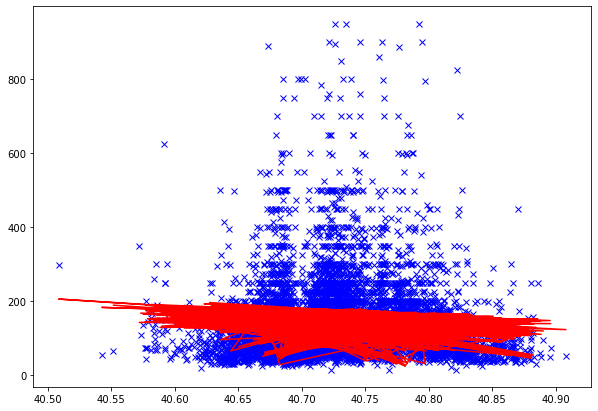

In [30]:
fig,ax = plt.subplots()
Y_pred=X.dot(theta)
ax.plot(X[:,1],Y,'x',color='Blue')
plt.plot(X[:,1], Y_pred, color='red')
fig.set_size_inches(10, 7) 
plt.show()

Y= theta_0+theta_1*x_1+theta_2*x_2+theta_3*x_3+....

This is our linear regression plot , which doesn't look that great and that makes sense since we tried plotting how 9 features are influencing price , so plot is not telling us much , therefore for this purpose we have calculates theta values to make our predictions 

In [31]:
Y_pred-Y

array([ -1.25512715, -58.69126371,  59.42967919, ...,   6.38149993,
        31.95297599, -17.02029915])

In [32]:
(Y_pred-Y).mean()

0.010833700833039028

In [33]:
(Y_pred-Y).min()

-815.5068648892347

In [34]:
(Y_pred-Y).max()

165.80202494713103

Calculating the RSS function for theta

In [35]:
RSS_cost=((Y_pred-Y).transpose()).dot(Y_pred-Y)

In [36]:
RSS_cost

75828691.62620279

Calcualting square root of RSS divided by n to get better results

In [37]:
RSS_cost/7549 #7549 is n 

10044.865760524943

In [38]:
from math import sqrt
sqrt(10044.865760524943)

100.22407774843799